In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [2]:
def f1(x):
    return np.exp(-x**2)

In [3]:
def f2(x):
    return (np.sin(x))**0.5

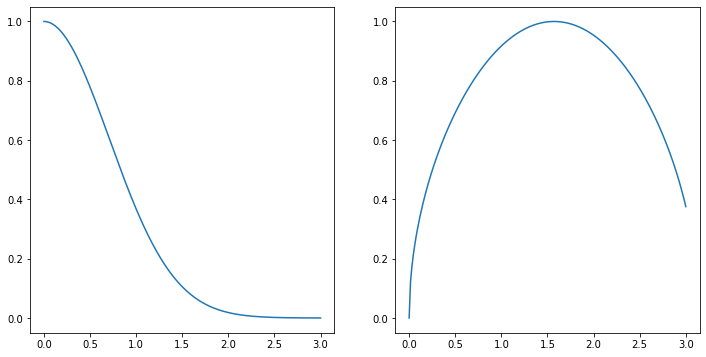

In [9]:
a = 0
b = 3
xx = np.linspace(a, b, 200)
y1 = f1(xx)
y2 = f2(xx)
plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 2, 1)
ax.plot(xx, y1)
ax = plt.subplot(1, 2, 2)
ax.plot(xx, y2)

In [65]:
def left_rect_meth(a, b, f, N):
    pas = (b - a) / N
    sum = 0
    for i in range(N):
        sum += f(a + i * pas)
    return sum * pas

In [78]:
def left_rect_meth2(f, x):
    return np.sum(f(x[0:-1])) * (x[1] - x[0])

In [79]:
def right_rect_meth(a, b, f, N):
    pas = (b - a) / N
    sum = 0
    for i in range(N):
        sum += f(a + (i + 1) * pas)
    return sum  * pas

In [83]:
def right_rect_meth2(f, x):
    return np.sum(f(x[1:])) * (x[1] - x[0])

In [84]:
print(left_rect_meth(0, 3, f1, 6))
print(right_rect_meth(0, 3, f1, 6))
print(left_rect_meth2(f1, np.linspace(0, 3, 7)))
print(right_rect_meth2(f1, np.linspace(0, 3, 7)))


1.1361627709148368
0.6362244758168801
1.1361627709148368
0.6362244758168801


In [81]:
quad(f1, a, b, epsabs=1e-14)

(0.8862073482595214, 3.176820740561071e-11)

In [93]:
def midle_point_meth(a, b, f, N):
    pas = (b - a) / N
    sum = 0
    for i in range(N):
        sum += f(a + (i + 0.5) * pas)
    return sum * pas

In [94]:
def midle_point_meth2(f, x):
    pas = x[1] - x[0]
    return np.sum(f(x[0:-1] + pas / 2)) * pas

In [95]:
print (midle_point_meth(0, 3, f1, 6))
print (midle_point_meth2(f1, np.linspace(0, 3, 7)))

0.8862135935945482
0.8862135935945482


In [49]:
def trapeze_meth(a, b, f, N):
    pas = (b - a) / N
    sum = 0
    for i in range(N):
        sum +=  (f(a + i * pas) + f(a + (i + 1) * pas))
    return sum * pas / 2

In [96]:
def trapeze_meth2(f, x):
    pas = x[1] - x[0]
    return np.sum(f(x[0:-1]) + f(x[1:])) * pas / 2

In [97]:
print (trapeze_meth(0, 3, f1, 6))
print (trapeze_meth2(f1, np.linspace(0, 3, 7)))

0.8861936233658585
0.8861936233658585


In [51]:
def simpson_meth(a, b, f, N):
    pas = (b - a) / N
    sum = 0
    for i in range(N):
        sum +=  (f(a + i * pas) + 4 * f(a + (i + 0.5) * pas) + f(a + (i + 1) * pas))
    return sum * pas / 6

In [98]:
def simpson_meth2(f, x):
    pas = x[1] - x[0]
    return np.sum(f(x[0:-1]) + 4 * f(x[0:-1] + pas / 2) + f(x[1:])) * pas / 6

In [99]:
print (simpson_meth(0, 3, f1, 6))
print (simpson_meth2(f1, np.linspace(0, 3, 7)))

0.8862069368516515
0.8862069368516515


In [219]:
def Eh(f, a, b, method, h):
    x = np.arange(a, b + h, h)
    return np.abs(quad(f, a, b, epsabs=1e-14)[0] - method(f, x))

In [220]:
def error(f, a, b, method):
    err = 10**-14
    H = [(1/2)**n for n in range(6)]
    r = 1
    print("-------------" * (r + 1))
    print(f"  h           ", end='')
    for k in range(1, r + 1):
        print(f"Eh(f)/h^{k}   ", end='')
    print("")
    for h in H:
        print(f"{h:11.4e}  ", end='')
        for k in range(1, r + 1):
            print(f"{(Eh(f, a, b, method, h)/h**k):11.4e}  ", end='')
        print("")

In [221]:
error(f1, 0, 3, trapeze_meth2)
error(f1, 0, 3, simpson_meth2)

--------------------------
  h           Eh(f)/h^1   
 1.0000e+00   4.9437e-05  
 5.0000e-01   2.7450e-05  
 2.5000e-01   1.4959e-05  
 1.2500e-01   7.6533e-06  
 6.2500e-02   3.8490e-06  
 3.1250e-02   1.9273e-06  
--------------------------
  h           Eh(f)/h^1   
 1.0000e+00   3.4779e-05  
 5.0000e-01   8.2282e-07  
 2.5000e-01   1.1585e-07  
 1.2500e-01   1.4917e-08  
 6.2500e-02   1.8785e-09  
 3.1250e-02   2.3525e-10  


In [222]:
def error_graph(f, a, b, method):
    err = 10**-14
    H = [(1/2)**n for n in range(6)]
    Y = []
    for h in H:
        Y += [Eh(f, a, b, method, h)]
    plt.yscale('log')
    plt.xscale('log')
    plt.scatter(H, Y)

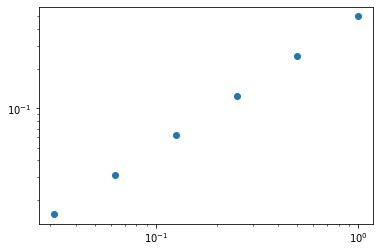

In [223]:
error_graph(f1, 0, 3, left_rect_meth2)


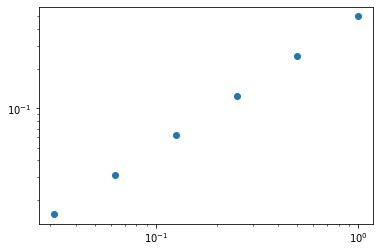

In [224]:
error_graph(f1, 0, 3, right_rect_meth2)


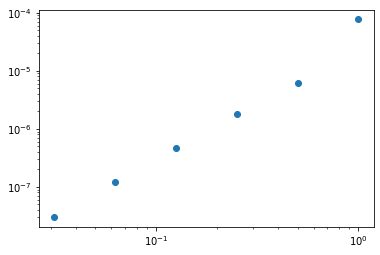

In [225]:
error_graph(f1, 0, 3, midle_point_meth2)


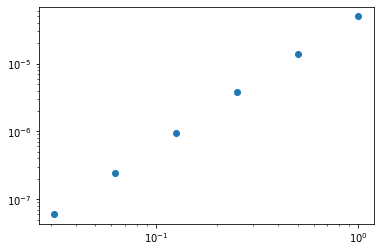

In [226]:
error_graph(f1, 0, 3, trapeze_meth2)

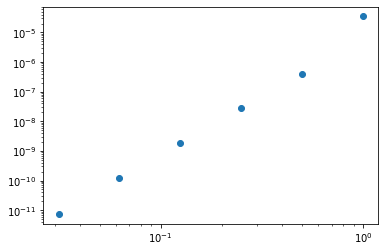

In [227]:
error_graph(f1, 0, 3, simpson_meth2)


In [250]:
def error_graph(f, a, b, method):
    H = np.array([(1/2)**n for n in range(1, 10)])
    Y = np.zeros(H.size)
    for i, h in enumerate(H):
        Y[i] = Eh(f, a, b, method, h)
    Y_log = np.log(Y)
    H_log = np.log(H)
    d = np.polyfit(H_log, Y_log, 1)
    print(d)
    xx = np.linspace(0, 1, 100)
    plt.plot(xx, xx * d[0] + d[1])

[ 1.11455203 -1.00317106]
[ 1.50461667 -3.52888353]
[ 1.54804769 -1.28478837]


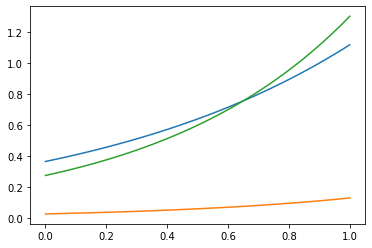

In [251]:
error_graph(f2, 0, 3, left_rect_meth2)
error_graph(f2, 0, 3, simpson_meth2)
error_graph(f2, 0, 3, trapeze_meth2)


In [314]:
def Eh(f, a, b, method, h):
    x = np.arange(a, b + h, h)
    return np.abs(quad(f, a, b, epsabs=1e-14)[0] - method(f, x))

In [318]:
def Eh(f, a, b, method, h):
    x = np.arange(a, b + h, h)
    E = np.array([np.abs(quad(f, x[i], x[i + 1], epsabs=1e-14)[0] - method(f, x[i:i+2])) for i in range(len(x) - 1)])
    return np.sum(E)
    # return np.abs(quad(f, a, b, epsabs=1e-14)[0] - method(f, x))

In [319]:
def plot_error(f, a, b, M):
    fig = plt.figure(figsize=(6, 6))
    ax = plt.subplot(1, 1, 1)
    ax.set_xscale('log')
    ax.set_yscale('log')
    H = np.array([(1/2)**n for n in range(1, 7)])
    err = np.zeros(H.size)
    for k, m in enumerate(M):
        for i, h in enumerate(H):
            err[i] = Eh(f, a, b, m, h)
        err_log = np.log(err)
        H_log = np.log(H)
        p = np.polyfit(H_log, err_log, 1)
        ax.scatter(H, err)
        ax.plot(H, np.exp(H_log * p[0] + p[1]), label=f"{m.__name__}, ordre = {round(p[0])}")
        ax.legend()

        

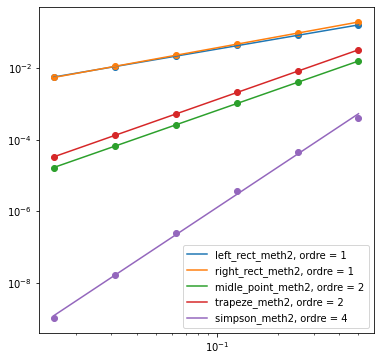

In [320]:

M = [left_rect_meth2, right_rect_meth2, midle_point_meth2, trapeze_meth2, simpson_meth2]
plot_error(f2, 1, 3, M)
